# Milestones 1

---

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program khususnya pada Phase 1 dalam konsep Supervised Learning.


## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![Marketing](https://accurate.id/wp-content/uploads/2021/12/tujuan-marketing.png)

### Dataset

Dataset yang digunakan pada pada project ini adalah dataset terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('**ya**') atau tidak ('**tidak**') berlangganan. Dataset ini berisi 41188 baris dengan 21 kolom yang diantaranya adalah age, job, marital, education, housing, loan, contact, dan masih banyak lagi. Dataset dapat dilihat di [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

### Objectives

**Milestones 1** ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

## Import Libraries

Menggunakan extension `patch_sklearn()` dari Intel® untuk mempercepat training model.

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Pada milestone 1 ini akan menggunakan library **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, dan **Scikit-Learn**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [3]:
pd.set_option('display.max_columns', None)

## Data Loading

Membuat dataframe bernama `bank` dari file `bank-additional-full.csv` dengan separator "**;**".

In [4]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data Characteristics

In [6]:
bank.shape

(41188, 21)

Dataset ini memiliki **41188 baris** dengan **21 kolom**.

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dari basic info ini dapat diketahui datafrane terbentuk dari:
- 5 kolom dengan tipe **float**
- 5 kolom dengan tipe **integer**
- 11 kolom dengan tipe **object**

Jika dilihat dari basic info ini sepertinya tidak ada missing value pada dataframe.

In [8]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Jika dilihat dari summary statistics terdapat anomali pada kolom `age`, `duration`, `pdays`, dan `emp.var.rate` karena nilai minimumnya jauh dari quartile pertamanya. Maka, akan dilihat lebih detail pada bagian **EDA**.

## Data Cleaning

### Missing Values

Akan dilakukan pengecekan terhadap missing value.

In [9]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak terdapat missing value pada dataset.

### Duplicated Data

pada bagian ini akan dilakukan pengecekan terhadap data duplikat.

In [10]:
bank.duplicated().sum()

12

Ditemukan ada **12 baris** data duplikat pada dataset.

In [11]:
bank[bank.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Tabel diatas adalah data duplikat yang ditemukan, semua **data duplikat akan dihapus** dari dataframe.

In [12]:
bank = bank.drop_duplicates(keep='first')

In [13]:
bank.duplicated().sum()

0

Sekarang sudah tidak lagi terdapat data duplikat pada dataframe.

### Column Rename

Pada bagian ini akan mengubah nama kolom pada dataframe seperti contohnya `emp.var.rate` akan diubah menjadi `emp_var_rate` agar memudahkan saat pemanggilan kolom.

In [14]:
bank = bank.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employed', 'y': 'subscribed'})

In [15]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**NOTE**: nama kolom `y` diubah menjadi `subscribed` agar lebih merepresentasikan value pada kolomnya.

## Exploratory Data Analysis

### Subscribed (Target Label)

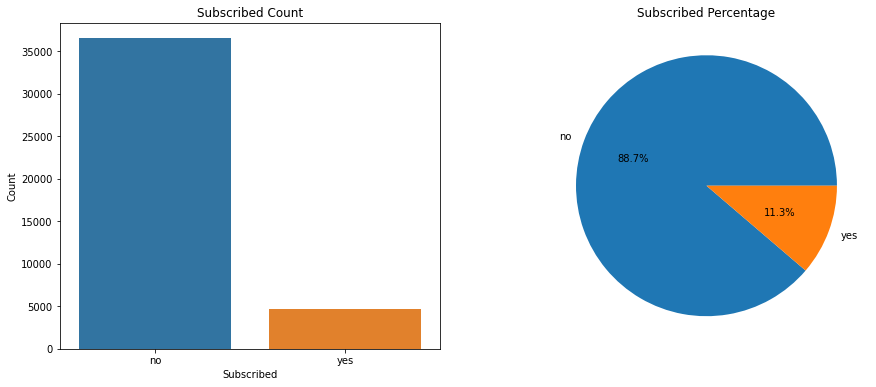

In [16]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='subscribed', data=bank)
plt.title('Subscribed Count')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(bank.subscribed.value_counts(), labels=bank.subscribed.value_counts().index, autopct='%1.1f%%')
plt.title('Subscribed Percentage')
plt.show()

Kebanyakan dari orang **tidak** berlangganan dengan persentasi orang yang berlangganan produk deposito bank hanya sekitar **11%** saja.

### Age

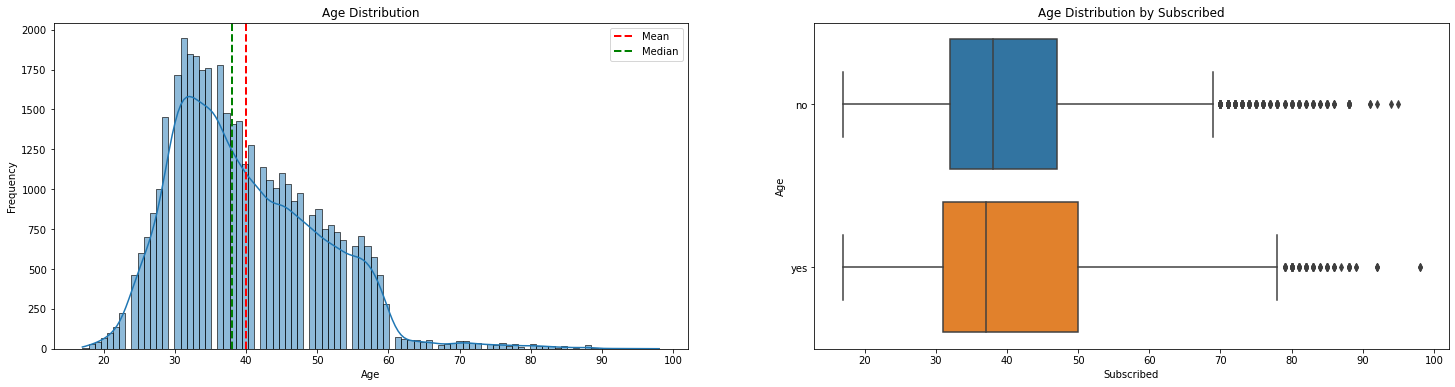

Skewness: 0.7845602604159753
Minumum Age: 17
Maximum Age: 98


In [17]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=bank, kde=True)
plt.axvline(bank.age.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(bank.age.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='age', y='subscribed', data=bank)
plt.title('Age Distribution by Subscribed')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.show()
print(f'Skewness: {bank.age.skew()}')
print(f'Minumum Age: {bank.age.min()}')
print(f'Maximum Age: {bank.age.max()}')

Kolom `age` memiliki nilai skewness sebesar 0.785 yang berarti distribusi dari kolom ini Skewed dan jika dilihat dari bentuk histogramnya distribusi dari kolom ini adalah **Right-Skewed**. Usia paling muda adalah **17 tahun** dan usia paling tua adalah **98 tahun**, yang jika dilihat dari box plot rentang usia dari orang yang berlangganan dan yang tidak berlangganan sedikit berbeda.

### Job

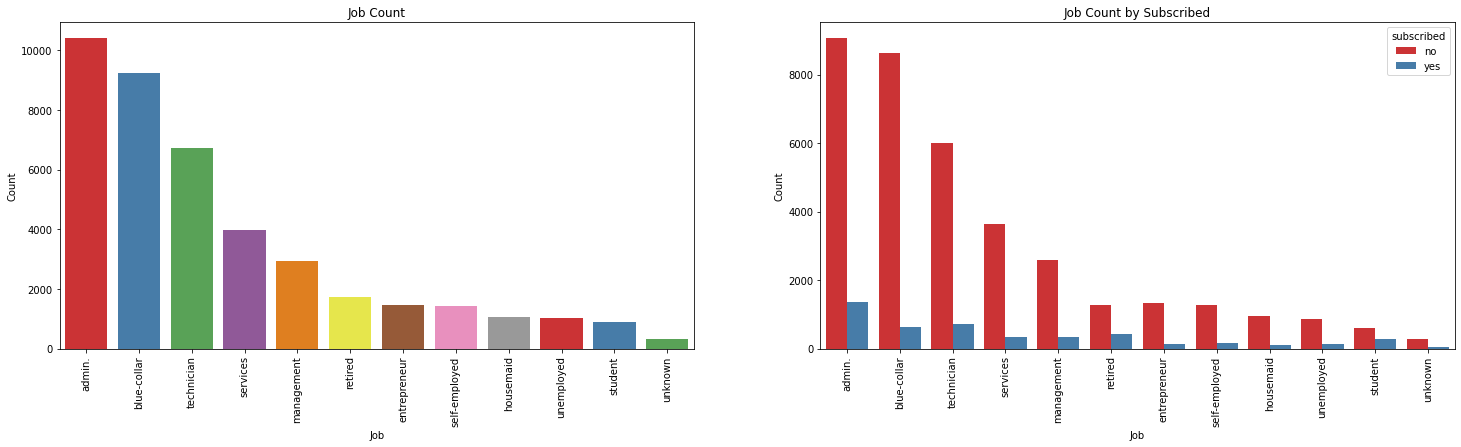

In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='job', data=bank, order=bank.job.value_counts().index, palette='Set1')
plt.title('Job Count')
plt.xlabel('Job')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='job', data=bank, order=bank.job.value_counts().index, palette='Set1', hue='subscribed')
plt.title('Job Count by Subscribed')
plt.xlabel('Job')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

### Contact

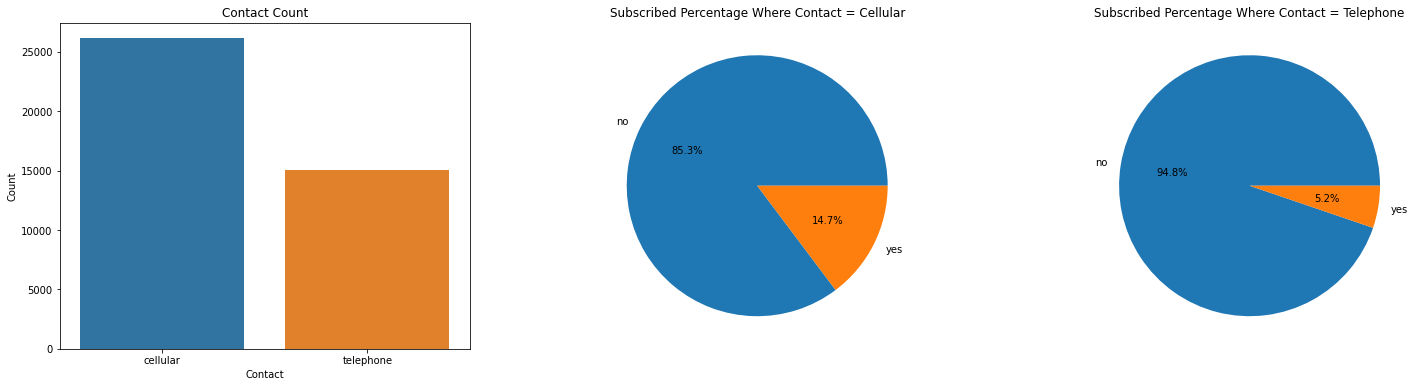

In [19]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='contact', data=bank, order=bank.contact.value_counts().index)
plt.title('Contact Count')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(bank[bank.contact == 'cellular'].subscribed.value_counts(), labels=bank[bank.contact == 'cellular'].subscribed.value_counts().index, autopct='%1.1f%%')
plt.title('Subscribed Percentage Where Contact = Cellular')
plt.subplot(1, 3, 3)
plt.pie(bank[bank.contact == 'telephone'].subscribed.value_counts(), labels=bank[bank.contact == 'telephone'].subscribed.value_counts().index, autopct='%1.1f%%')
plt.title('Subscribed Percentage Where Contact = Telephone')
plt.show()

### Month & Day

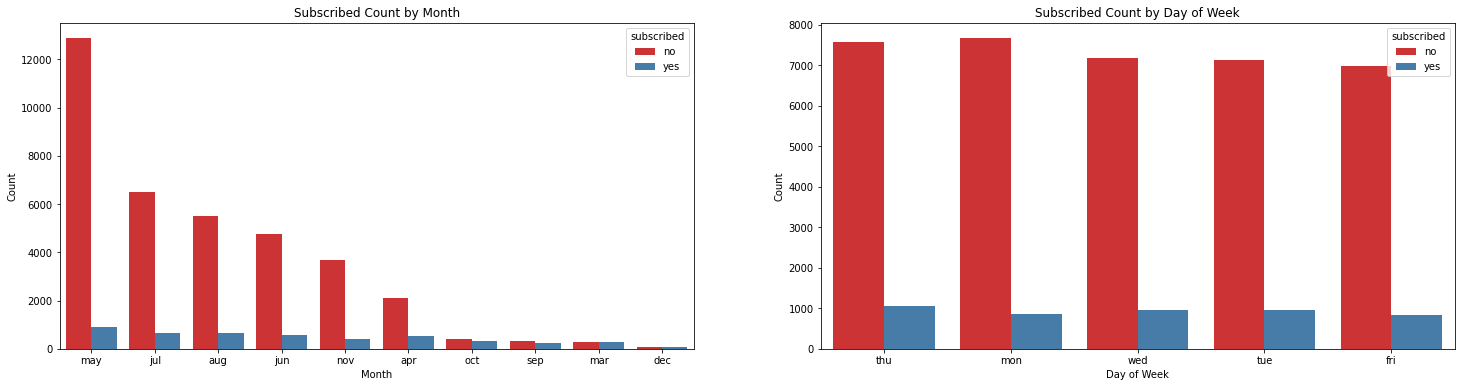

In [20]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='month', data=bank, order=bank.month.value_counts().index, palette='Set1', hue='subscribed')
plt.title('Subscribed Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', data=bank, order=bank.day_of_week.value_counts().index, palette='Set1', hue='subscribed')
plt.title('Subscribed Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

### Duration

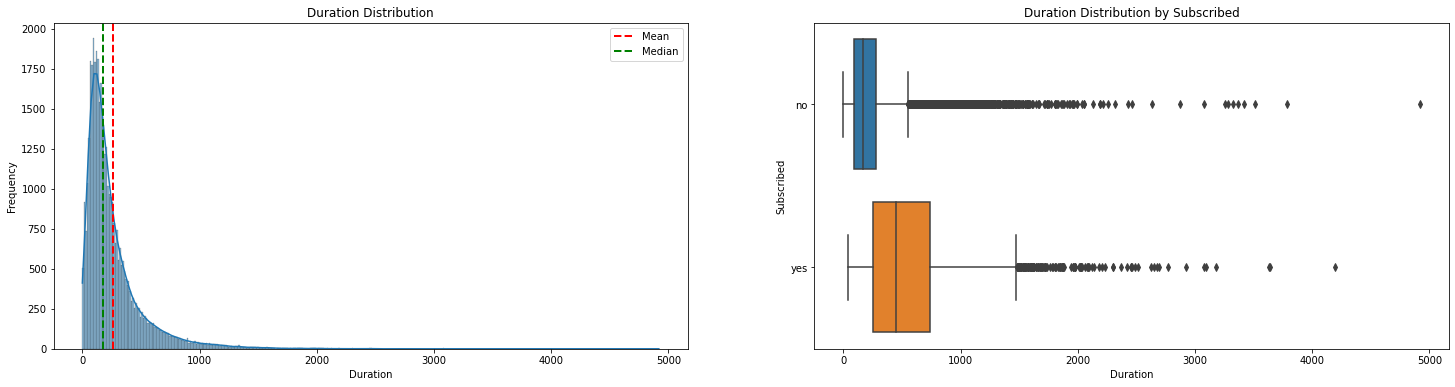

Skewness: 3.2628075094947224
Mean: 258.3158150378861
Median: 180.0


In [21]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='duration', data=bank, kde=True)
plt.axvline(bank.duration.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(bank.duration.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='duration', y='subscribed', data=bank)
plt.title('Duration Distribution by Subscribed')
plt.xlabel('Duration')
plt.ylabel('Subscribed')
plt.show()
print(f'Skewness: {bank.duration.skew()}')
print(f'Mean: {bank.duration.mean()}')
print(f'Median: {bank.duration.median()}')
